<a href="https://colab.research.google.com/github/zainabalriyami/genderclassification/blob/main/Hubble_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'zainabalriyami1'
os.environ['KAGGLE_KEY'] = '0074b8f87805b3d9f4911eb05a55f344'

In [22]:
!kaggle datasets download -d gpiosenka/gender-classification-from-an-image

 97% 167M/172M [00:01<00:00, 135MB/s]
100% 172M/172M [00:02<00:00, 88.8MB/s]


In [23]:
import zipfile
zip_ref = zipfile.ZipFile(r'/content/gender-classification-from-an-image.zip')
zip_ref.extractall(r'/content')
zip_ref.close()

In [53]:
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [54]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gender/test', 
    labels='inferred', 
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  )

Found 200 files belonging to 2 classes.


In [55]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gender/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 200 files belonging to 2 classes.


In [56]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [57]:
train_ds = train_ds.map(process) 
validation_ds = validation_ds.map(process)

In [58]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [59]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [60]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [31]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [32]:
model.add(Flatten())

In [61]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification


In [36]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [39]:
from keras.callbacks import History
History=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 [==============================] - 56s 8s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 45s 6s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 42s 6s/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 43s 6s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 42s 6s/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 40s 6s/step - loss: 0.6930 - accuracy: 0.5500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
7/7 [==================

In [49]:
import matplotlib.pyplot as plt

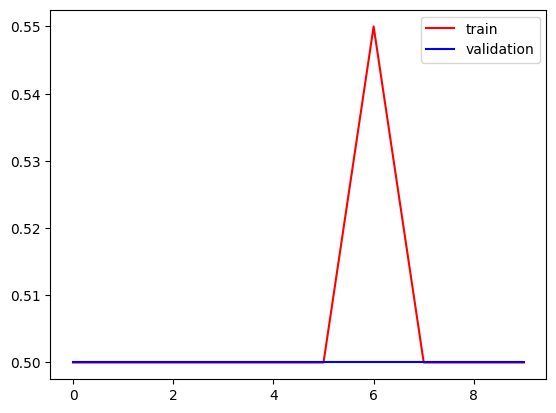

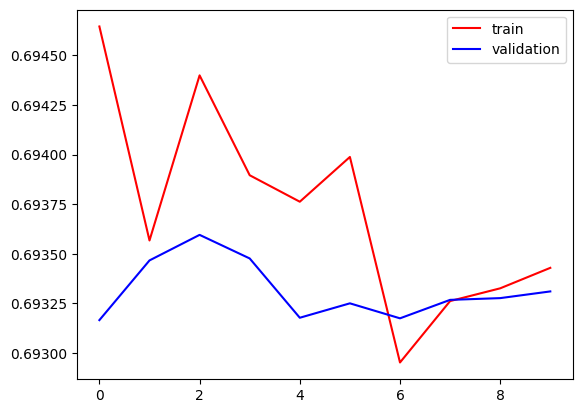

In [51]:
plt.plot(History.history['accuracy'],color='red',label='train')
plt.plot(History.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


plt.plot(History.history['loss'],color='red',label='train')
plt.plot(History.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [62]:
import cv2

In [63]:
from IPython.testing import test
test_img = cv2.imread('/content/gender/test/female/003.jpg')

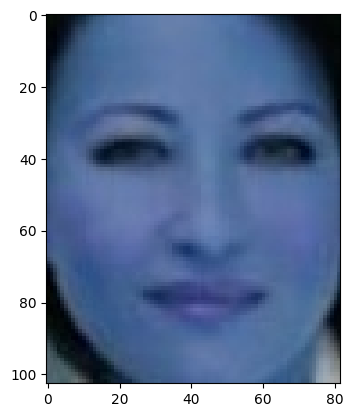

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(103, 82, 3)

In [66]:
test_img = cv2.resize(test_img,(256,256))  

In [67]:
test_input = test_img.reshape((1,256,256,3))  

In [68]:
model.predict(test_input)  

1/1 [==============================] - 0s 303ms/step


array([[[[0.57374495],
         [0.537274  ],
         [0.5669554 ],
         ...,
         [0.52643746],
         [0.5434887 ],
         [0.53566736]],

        [[0.5480107 ],
         [0.5302262 ],
         [0.53879976],
         ...,
         [0.4983462 ],
         [0.51363593],
         [0.54223627]],

        [[0.5630733 ],
         [0.46879172],
         [0.48323643],
         ...,
         [0.48150766],
         [0.49821088],
         [0.5420384 ]],

        ...,

        [[0.43780237],
         [0.46262988],
         [0.68064255],
         ...,
         [0.3348963 ],
         [0.3354361 ],
         [0.35083655]],

        [[0.42377436],
         [0.5024555 ],
         [0.47942668],
         ...,
         [0.3706522 ],
         [0.32455352],
         [0.35093257]],

        [[0.42459673],
         [0.54324263],
         [0.50543904],
         ...,
         [0.32729194],
         [0.29940128],
         [0.30716497]]]], dtype=float32)